The data files include an error but this error includes both semantic and statistical error.
I am using a sampling method and variance to simulate a statistical error for the data.

In [4]:
import numpy as np 
import pandas as pd
import glob,os
import matplotlib.pyplot as plt

In [72]:
def findGap(data):
    missingdata=0
    maxS=0
    ref_timediff=0.001389
    for i in range(data.shape[0]-1):
        timediff=abs(round(data[i]-data[i+1],6))
        if not timediff==ref_timediff:
            scale=round(timediff/ref_timediff)
            
            if scale>maxS:
                maxS=scale-1
                indexM=i
                
            
    return indexM


In [94]:
def stat_err(df,gapI,sampleL=100):
    statErrList=[]
    #devide the data into two left and right side depends on when the large gab in the data is
    dfL=df.iloc[:gapI+1]
    dfR=df.iloc[gapI+1:]
    
    dummy=sampleL
    Res=dfL.shape[0]%dummy
    if Res/dummy<0.6:
        dummy+=1
    Nsample=dfL.shape[0]//dummy

    for i in range(Nsample+1):
        if i==Nsample:
            dfn=dfL.iloc[i*dummy:]
        else:
            dfn=dfL.iloc[i*dummy:(i+1)*dummy]

        OneSigma=dfn['relative_flux'].std()
        statErrList.append([OneSigma]*dfn.shape[0])


    dummy=sampleL
    Res=dfR.shape[0]%dummy
    if Res/dummy<0.6:
        dummy+=1
    Nsample=dfR.shape[0]//dummy
    for i in range(Nsample+1):
        if i==Nsample:
            dfn=dfR.iloc[i*dummy:]
        else:
            dfn=dfR.iloc[i*dummy:(i+1)*dummy]

        OneSigma=dfn['relative_flux'].std()
        statErrList.append([OneSigma]*dfn.shape[0])


    FlatList=[i for lists in statErrList for i in lists ]
    df["Stat_Err"]=FlatList
    
    return df

In [95]:
#read in files:
#4FGL J0958.7+6534
folder="../NASA_ADAP_TESS_AGN-SPOC/FermiLAT_Targets/3FGLJ0958.6+6534/data/"
files=sorted(glob.glob("{}/TESS_PDCSAP_FLUX_*".format(folder)))
skyra=149.697 #deg Equatorial
skydec=65.5652 #deg


5 ../NASA_ADAP_TESS_AGN-SPOC/FermiLAT_Targets/3FGLJ0958.6+6534/data/TESS_PDCSAP_FLUX_Sector14.csv


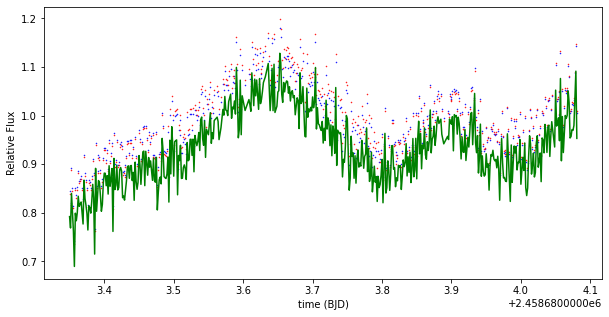

5 ../NASA_ADAP_TESS_AGN-SPOC/FermiLAT_Targets/3FGLJ0958.6+6534/data/TESS_PDCSAP_FLUX_Sector20.csv


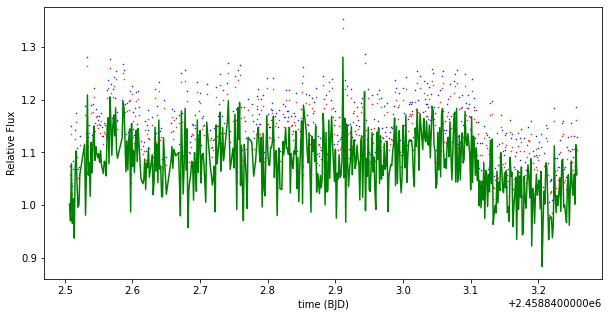

5 ../NASA_ADAP_TESS_AGN-SPOC/FermiLAT_Targets/3FGLJ0958.6+6534/data/TESS_PDCSAP_FLUX_Sector21.csv


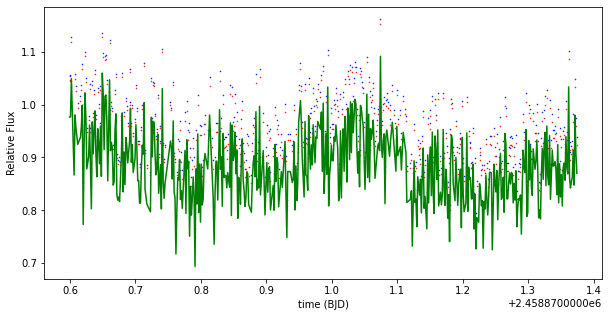

5 ../NASA_ADAP_TESS_AGN-SPOC/FermiLAT_Targets/3FGLJ0958.6+6534/data/TESS_PDCSAP_FLUX_Sector40.csv


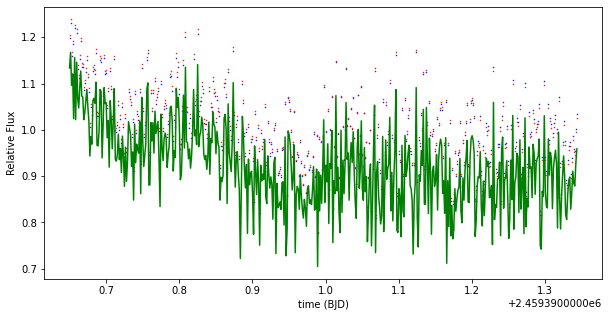

5 ../NASA_ADAP_TESS_AGN-SPOC/FermiLAT_Targets/3FGLJ0958.6+6534/data/TESS_PDCSAP_FLUX_Sector41.csv


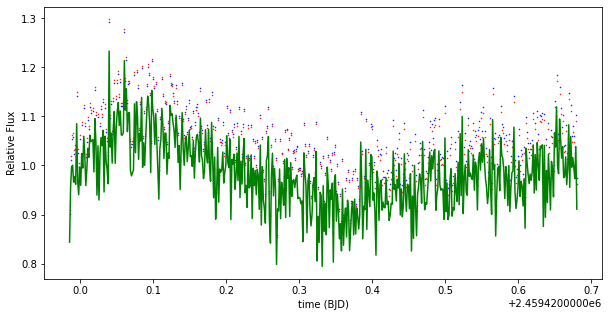

5 ../NASA_ADAP_TESS_AGN-SPOC/FermiLAT_Targets/3FGLJ0958.6+6534/data/TESS_PDCSAP_FLUX_Sector47.csv


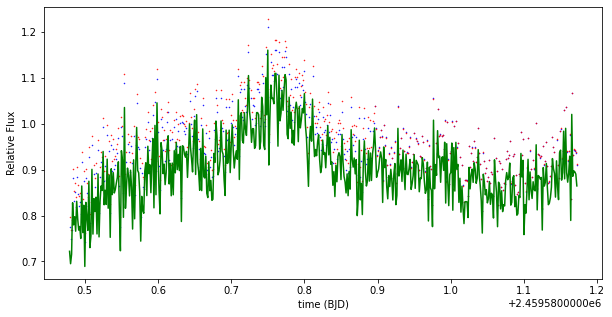

In [107]:
for file in files: 
    print(n,file)
    df=pd.read_csv(file,sep=",",header=[0])
    df.columns=["t_BJD","relative_flux","E_relative_flux"]
    #Tansu made a mistake and added an offset of 2,457,000 to the time. So I need to correct this:
    df["t_BJD"]-=2457000
    df=df.sort_values(by=["t_BJD"])
    
    gapI=findGap(df["t_BJD"])
    df=stat_err(df,gapI)
    
    #plot data
    fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=False,figsize=(10, 5))
    #plt.errorbar(df['t_BJD'],df['relative_flux'],df['E_relative_flux'],fmt='.', color='blue', ecolor='lightblue', elinewidth=1, capsize=1)
    
    df=df[:500]
    plt.scatter(df['t_BJD'],df['relative_flux']+df['E_relative_flux'], c='blue', marker=".",s=1)
    plt.scatter(df['t_BJD'],df['relative_flux']+df['Stat_Err'], c='red', marker=".",s=1)
    plt.plot(df['t_BJD'],df['relative_flux'], c='green')
    
    plt.xlabel("time (BJD)")
    plt.ylabel("Relative Flux")
    plt.show()


Apparently the simulated statistical error is almost similar to the relative error given by the data file.